# Experimentación

In [1]:
# Imports
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt

# Nuestros
import utils

In [2]:
# Files
DATA_DIR = "../data/"
NBA_SCORES = DATA_DIR + "nba_2016_scores.dat"
ATP_SCORES = DATA_DIR + "atp_matches_2015.dat.norm"

NBA_NAMES = DATA_DIR + "nba_2016_teams.csv"
ATP_NAMES = DATA_DIR + "atp_players.csv"

# Extension de resultados
OUT = ".out"

# Binario del TP
BIN = "../src/tp"

# Metodos
TYPE_WP = "1"
TYPE_CMM = "0"

## Datos reales

### Analizar datos de entrada

Text(0.5, 1.0, 'Share de equipos para ATP')

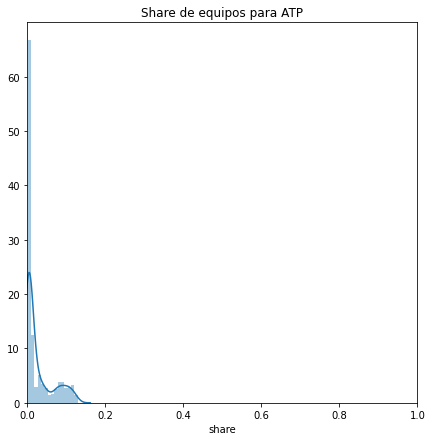

In [3]:
df_atp = utils.analyze_data(ATP_SCORES)
plt.subplots(1, 1, figsize=(7, 7))
plot = sns.distplot(df_atp["share"])
plot.set_xlim(0, 1)
plot.set_title("Share de equipos para ATP")

Text(0.5, 1.0, 'Participación de equipos para ATP')

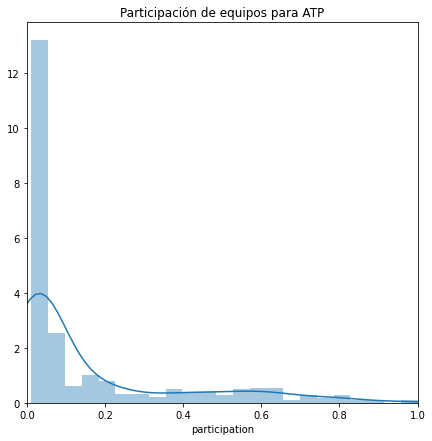

In [4]:
plt.subplots(1, 1, figsize=(7, 7))
plot = sns.distplot(df_atp["participation"])
plot.set_xlim(0, 1)
plot.set_title("Participación de equipos para ATP")

Text(0.5, 1.0, 'Share de equipos para NBA')

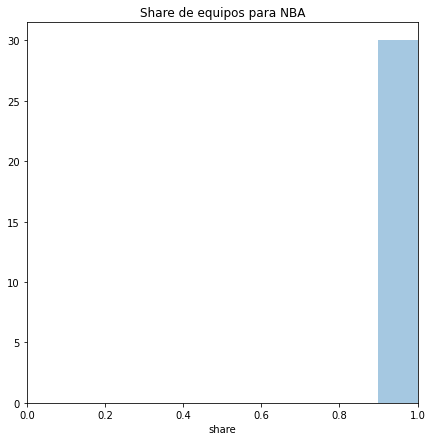

In [5]:
df_nba = utils.analyze_data(NBA_SCORES)
plt.subplots(1, 1, figsize=(7, 7))
plot = sns.distplot(df_nba["share"], kde=False)
plot.set_xlim(0, 1)
plot.set_title("Share de equipos para NBA")

Text(0.5, 1.0, 'Participación de equipos para NBA')

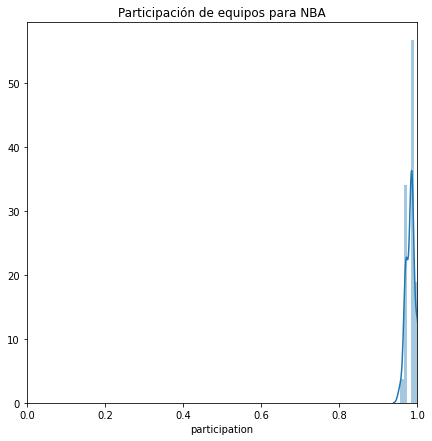

In [6]:
plt.subplots(1, 1, figsize=(7, 7))
plot = sns.distplot(df_nba["participation"])
plot.set_xlim(0, 1)
plot.set_title("Participación de equipos para NBA")

### Correr y levantar rankings reales resultantes

(0.0, 1.2304963463722713)

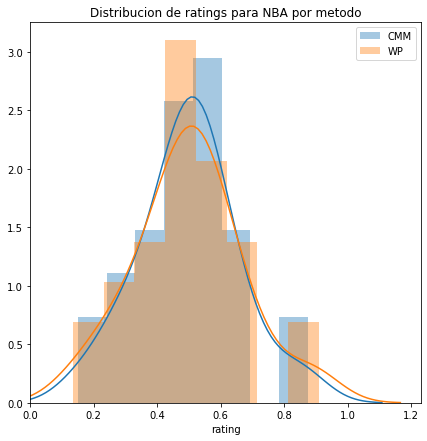

In [7]:
utils.run(NBA_SCORES, TYPE_CMM)
utils.run(NBA_SCORES, TYPE_WP)

nba_cmm = utils.read_ranking(NBA_SCORES+TYPE_CMM+OUT)
nba_wp = utils.read_ranking(NBA_SCORES+TYPE_WP+OUT)

plt.subplots(1, 1, figsize=(7, 7))
sns.distplot(nba_cmm["rating"], label="CMM")
sns.distplot(nba_wp["rating"], label="WP")
plt.legend()
plt.title("Distribucion de ratings para NBA por metodo")
plt.xlim(0)

In [8]:
#names = pd.read_csv(NBA_TEAMS, sep=',', header=None, names=["idx", "name"])
# map https://stackoverflow.com/questions/59180942/pandas-mapping-one-column-values-using-other-dataframe-column
#ranking['names'] = (ranking.index + 1).map(names.set_index("idx")["name"])
#ranking.sort_values("rating")

(0.0, 1.5121070378033967)

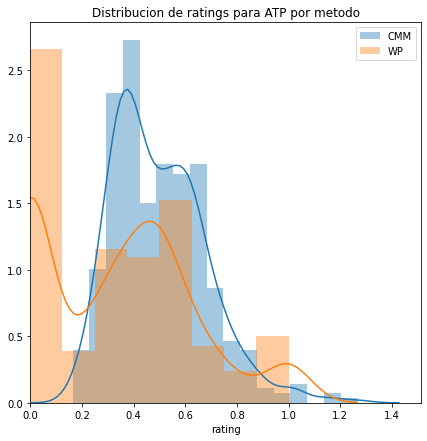

In [9]:
utils.run(ATP_SCORES, TYPE_CMM)
utils.run(ATP_SCORES, TYPE_WP)

atp_cmm = utils.read_ranking(ATP_SCORES+TYPE_CMM+OUT)
atp_wp = utils.read_ranking(ATP_SCORES+TYPE_WP+OUT)

plt.subplots(1, 1, figsize=(7, 7))
sns.distplot(atp_cmm["rating"], label="CMM")
sns.distplot(atp_wp["rating"], label="WP")
plt.legend()
plt.title("Distribucion de ratings para ATP por metodo")
plt.xlim(0)

In [10]:
#names = pd.read_csv(NBA_TEAMS, sep=',', header=None, names=["idx", "name"])
#names.head()

# map https://stackoverflow.com/questions/59180942/pandas-mapping-one-column-values-using-other-dataframe-column
#ranking['names'] = (ranking.index + 1).map(names.set_index("idx")["name"])
#ranking.sort_values("rating")